# SI 671 Homework 1
Chenyun Tao  Uniq: cyuntao

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 1. Data Exploration
### 1.1 Load & transform the Twitter emoji dataset
a)

In [2]:
with open('itemsets_data/food_drink_emoji_tweets.txt', 'r', encoding='utf-8') as f:
    tweets = f.read().splitlines()

In [3]:
tweets_df = pd.DataFrame(tweets, columns=['tweet'])
tweets_df.head()

,tweet
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...
1,RT @1_F_I_R_S_T: _ 🍈¹〉Grow your account fast! ...
2,RT @LegendDeols: 👉👉👉G€T Ready to dance💃🕺🕺🕺💃💃💃 ...
3,@britch_x Hubby's friend bought us Wendy's-che...
4,RT @DAILYPUPPlES: Workout partner ☕🍌😍 https://...


b)

In [4]:
emoji_set = {'🍫', '🍡', '🍏', '🍈', '🍯', '🥠', '🍪', '🌰', '🥯', '🍐', '🌯', '🍧', '🥮', '🥚', '🍎', '🍍', '🍠', '🍨', '🥣', '🍊', '🍘', '🍆', '🥓', '🌽', '🥐', '🌮', '🍬', '🍛', '🥘', '🥔', '🍿', '🍉', '🥞', '🍄', '🎂', '🧀', '🥩', '🍺', '🦀', '🥦', '🥭', '🍒', '🍤', '🦐', '🥝', '🥙', '🍖', '🥜', '🍥', '🍷', '🍾', '🍲', '🧂', '🥪', '🍚', '🥬', '🥑', '🍙', '🍞', '🥃', '🥗', '🍕', '🍔', '🥕', '🧁', '🍋', '🍰', '🥫', '🍗', '🥧', '🥛', '🍮', '🥡', '🍟', '🍅', '🥂', '🍸', '🥥', '🍢', '🍌', '🍝', '🍵', '🍼', '🍦', '🍭', '🍑', '🍹', '🍇', '🥨', '🍱', '🦞', '☕', '🌶', '🍻', '🍳', '🥒', '🍣', '🥟', '🥖', '🍶', '🍜', '🍓', '🦑', '🍩', '🌭'}

In [5]:
def filterEmoji(tweet):
    return np.unique([c for c in tweet if c in emoji_set])

In [6]:
tweets_df['food_drink_emoji'] = tweets_df['tweet'].apply(filterEmoji)
tweets_df.head()

,tweet,food_drink_emoji
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...,"[🌯, 🍒, 🍔, 🍗]"
1,RT @1_F_I_R_S_T: _ 🍈¹〉Grow your account fast! ...,"[🍇, 🍈, 🍉, 🍊, 🍍, 🍓]"
2,RT @LegendDeols: 👉👉👉G€T Ready to dance💃🕺🕺🕺💃💃💃 ...,"[🍸, 🥃]"
3,@britch_x Hubby's friend bought us Wendy's-che...,"[🍔, 🍟]"
4,RT @DAILYPUPPlES: Workout partner ☕🍌😍 https://...,"[☕, 🍌]"


c)

In [7]:
mlb = MultiLabelBinarizer()
emoji_matrix_np = mlb.fit_transform(tweets_df['food_drink_emoji'])
emoji_matrix_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
emoji_matrix = pd.DataFrame(emoji_matrix_np, columns=mlb.classes_)
emoji_matrix.head()

,☕,🌭,🌮,🌯,🌰,🌶,🌽,🍄,🍅,🍆,...,🥭,🥮,🥯,🦀,🦐,🦑,🦞,🧀,🧁,🧂
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.2 Exploratory Data Analysis (EDA)
a)

In [9]:
print('{} different emojis are used in the dataset'.format(len(mlb.classes_)))

105 different emojis are used in the dataset


b)

In [10]:
emoji_distribution = tweets_df['food_drink_emoji'].apply(len)
print('On average, {} emojis are used in a Tweet'.format(emoji_distribution.mean()))

On average, 2.6302 emojis are used in a Tweet


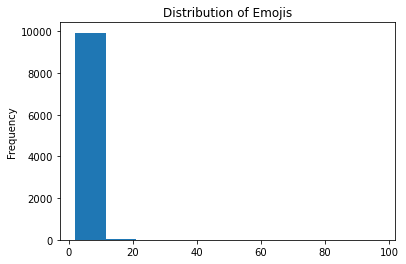

In [11]:
_ = emoji_distribution.plot(kind='hist', title='Distribution of Emojis')

The emoji distribution is shown above, which seems to be quite right-skewed, so I decide to zoom in the histogram to better view the distribution. As there're only 4 tweets with emojis more than 25, I zoom into the range [0, 25] to create another histogram.

In [12]:
emoji_distribution[emoji_distribution > 25]

4991    51
5764    43
6298    32
8801    97
Name: food_drink_emoji, dtype: int64

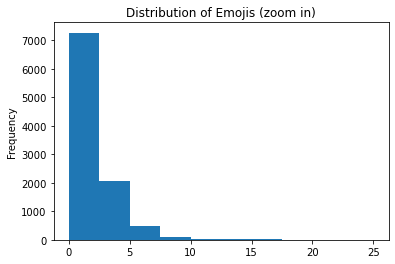

In [13]:
_ = emoji_distribution.plot(kind='hist', range=[0, 25], title='Distribution of Emojis (zoom in)')

The emoji distribution looks like a power law distribution.

c)

In [14]:
emoji_counter = {}
for emoji in emoji_matrix.columns:
    emoji_counter[emoji] = sum(emoji_matrix[emoji] > 0)
print('The top 5 emojis in the dataset are: {}'.format(
    sorted(emoji_counter, key=emoji_counter.get, reverse=True)[:5]))

The top 5 emojis in the dataset are: ['🍻', '🎂', '🍔', '🍾', '🥂']


## 2 The Apriori Algorithm

a)

In [15]:
"""
Parameters:
    matrix - an one-hot encoded pandas DataFrame
    k - specify the result to be frequent k-itemsets
    min_support - minimal support
"""
def emoji_frequent_itemsets(matrix, k, min_support):
    frequent_itemsets = apriori(matrix, min_support, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
    return frequent_itemsets[frequent_itemsets['length'] == k][['support', 'itemsets']].reset_index(drop=True)

b)  
All frequent 3-itemsets with a min support of 0.007 are shown below.

In [16]:
emoji_frequent_itemsets(emoji_matrix, 3, 0.007)

,support,itemsets
0,0.0079,"(🍇, 🍊, 🍉)"
1,0.0092,"(🍟, 🍕, 🍔)"
2,0.0070,"(🍫, 🍭, 🍬)"
3,0.0117,"(🍸, 🍹, 🍷)"
4,0.0075,"(🍸, 🍺, 🍷)"
5,0.0076,"(🍸, 🍻, 🍷)"
6,0.0072,"(🍸, 🥂, 🍷)"
7,0.0072,"(🍺, 🍹, 🍷)"
8,0.0077,"(🍻, 🍹, 🍷)"
9,0.0070,"(🥂, 🍹, 🍷)"


### 2.1 Apriori Algorithm under the Hood
#### 2.1.1 Candidate Generation
a)

In [17]:
import emoji

In [18]:
freq_2_itemsets_df = pd.read_csv('itemsets_data/food_emoji_frequent_2_itemsets.csv', header=None, names=['itemsets'])
freq_2_itemsets_df['itemsets'] = freq_2_itemsets_df['itemsets'].apply(
    lambda x: set([e for e in x if e in emoji.UNICODE_EMOJI['en']]))
freq_2_itemsets_df.head()

,itemsets
0,"{🌭, 🍔}"
1,"{🌭, 🍕}"
2,"{🌮, 🍔}"
3,"{🌮, 🍕}"
4,"{🍑, 🍆}"


In [19]:
'''
def generate_candidate_3_itemsets(freq_2_itemsets):
    freq_1_itemsets = set.union(*freq_2_itemsets)
    freq_3_itemsets = set()
    
    for freq_2_itemset in freq_2_itemsets:
        for freq_1_itemset in freq_1_itemsets:
            newset = frozenset(list(freq_1_itemset) + list(freq_2_itemset))
            if len(newset) == 3:
                freq_3_itemsets.add(newset)
    return list(freq_3_itemsets)
'''
# self join frequent 2 itemsets as the lecture slide shows
def generate_candidate_3_itemsets(freq_2_itemsets):
    freq_3_itemsets = set()
    
    for set1 in freq_2_itemsets:
        for set2 in freq_2_itemsets:
            newset = set1.union(set2)
            if len(newset) == 3:
                freq_3_itemsets.add(frozenset(newset))
    return list(freq_3_itemsets)

In [20]:
candidate_3_itemsets = generate_candidate_3_itemsets(freq_2_itemsets_df['itemsets'].tolist())
candidate_3_itemsets

[frozenset({'🍊', '🍑', '🥝'}),
 frozenset({'🍦', '🍩', '🍭'}),
 frozenset({'🍦', '🍫', '🍬'}),
 frozenset({'🍨', '🍫', '🍭'}),
 frozenset({'🍕', '🍦', '🎂'}),
 frozenset({'🍇', '🍌', '🍓'}),
 frozenset({'🍉', '🍋', '🎂'}),
 frozenset({'🍊', '🍋', '🍍'}),
 frozenset({'🍊', '🍋', '🍎'}),
 frozenset({'🍇', '🍍', '🥝'}),
 frozenset({'🍉', '🎂', '🥝'}),
 frozenset({'🍊', '🍍', '🥝'}),
 frozenset({'🍇', '🍎', '🍒'}),
 frozenset({'🍇', '🍍', '🍒'}),
 frozenset({'🍉', '🍋', '🍒'}),
 frozenset({'🍉', '🍒', '🎂'}),
 frozenset({'🍉', '🍬', '🎂'}),
 frozenset({'🍉', '🍍', '🎂'}),
 frozenset({'🍉', '🍋', '🥝'}),
 frozenset({'🍇', '🍍', '🍎'}),
 frozenset({'🍉', '🍎', '🎂'}),
 frozenset({'🌭', '🍔', '🍦'}),
 frozenset({'🍦', '🍧', '🍫'}),
 frozenset({'🍧', '🍬', '🍰'}),
 frozenset({'🌮', '🍔', '🍟'}),
 frozenset({'🍦', '🍨', '🍪'}),
 frozenset({'🍉', '🍎', '🍏'}),
 frozenset({'🍊', '🍎', '🍓'}),
 frozenset({'🍉', '🍍', '🍏'}),
 frozenset({'🍧', '🍬', '🎂'}),
 frozenset({'🍩', '🍪', '🍫'}),
 frozenset({'🍩', '🍰', '🎂'}),
 frozenset({'🍊', '🍏', '🍑'}),
 frozenset({'🍧', '🍭', '🎂'}),
 frozenset({'🍉

In [21]:
print('The length of the candidate 3-itemsets generated by my generate_candidate_3_itemsets is {}'.format(
    len(candidate_3_itemsets)))

The length of the candidate 3-itemsets generated by my generate_candidate_3_itemsets is 286


b)

In [22]:
from itertools import combinations
def prune_candidate_3_itemsets(candidate_3_itemsets, freq_2_itemsets):
    freq_3_itemsets = set()
    for itemset in candidate_3_itemsets:
        subsets = [set(i) for i in combinations(itemset, 2)]
        if all(elem in freq_2_itemsets for elem in subsets):
            freq_3_itemsets.add(frozenset(itemset))
    return list(freq_3_itemsets)

In [23]:
new_candidate_3_itemsets = prune_candidate_3_itemsets(candidate_3_itemsets, freq_2_itemsets_df['itemsets'].tolist())
new_candidate_3_itemsets

[frozenset({'🍇', '🍍', '🥝'}),
 frozenset({'🍊', '🍍', '🥝'}),
 frozenset({'🍇', '🍎', '🍒'}),
 frozenset({'🍩', '🍪', '🍫'}),
 frozenset({'🍊', '🍎', '🍓'}),
 frozenset({'🍫', '🍰', '🎂'}),
 frozenset({'🍫', '🍭', '🍰'}),
 frozenset({'🍔', '🍕', '🍗'}),
 frozenset({'🍦', '🍧', '🍰'}),
 frozenset({'🍦', '🍧', '🎂'}),
 frozenset({'🍊', '🍌', '🍓'}),
 frozenset({'🍉', '🍎', '🍒'}),
 frozenset({'🍉', '🍍', '🥝'}),
 frozenset({'🍉', '🍌', '🍓'}),
 frozenset({'🍦', '🍩', '🍰'}),
 frozenset({'🍉', '🍑', '🍒'}),
 frozenset({'🍨', '🍫', '🍰'}),
 frozenset({'🍇', '🍊', '🍍'}),
 frozenset({'🍇', '🍎', '🍓'}),
 frozenset({'🍕', '🍗', '🍟'}),
 frozenset({'🍉', '🍑', '🍓'}),
 frozenset({'🍉', '🍊', '🍋'}),
 frozenset({'🍊', '🍑', '🍓'}),
 frozenset({'🍦', '🍨', '🍰'}),
 frozenset({'🍦', '🍨', '🎂'}),
 frozenset({'🍩', '🍫', '🍰'}),
 frozenset({'🍬', '🍭', '🍰'}),
 frozenset({'🍬', '🍭', '🎂'}),
 frozenset({'🍩', '🍪', '🍰'}),
 frozenset({'🍇', '🍉', '🍍'}),
 frozenset({'🍉', '🍊', '🍍'}),
 frozenset({'🍪', '🍫', '🍰'}),
 frozenset({'🍊', '🍍', '🍏'}),
 frozenset({'🍉', '🍍', '🍓'}),
 frozenset({'🍊

In [24]:
print('The length of my pruned candidate 3-itemsets is {}'.format(len(new_candidate_3_itemsets)))

The length of my pruned candidate 3-itemsets is 88


#### 2.1.2 Database Scan
a)

In [25]:
def calculate_frequent_itemsets(candidate_itemsets, min_support):
    candidate_df = pd.DataFrame({'itemset': new_candidate_3_itemsets, 'support': [0.0]*len(new_candidate_3_itemsets)})
    for i, row in emoji_matrix.iterrows():
        for j, candidate in candidate_df.iterrows():
            a, b, c = candidate['itemset']
            if row[a] and row[b] and row[c]:
                candidate_df['support'][j] += 1
    candidate_df['support'] /= len(emoji_matrix)
    return candidate_df[candidate_df['support'] >= min_support]['itemset'].tolist()

To test my function, I call calculate_frequent_itemsets to return all the frequent 3-itemsets with a minimal support of 0.007.

In [26]:
calculate_frequent_itemsets(new_candidate_3_itemsets, 0.007)

<ipython-input-25-810d0a37b4f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_df['support'][j] += 1


[frozenset({'🍔', '🍕', '🍟'}),
 frozenset({'🍫', '🍬', '🍭'}),
 frozenset({'🍇', '🍉', '🍊'})]

## 3. Evaluating Frequent Itemsets
a)

In [27]:
freq_itemsets = apriori(emoji_matrix, 0.005, use_colnames=True)
rules = association_rules(freq_itemsets, metric="lift", min_threshold=3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(☕),(🍩),0.0589,0.0312,0.0084,0.142615,4.570981,0.006562,1.129947
1,(🍩),(☕),0.0312,0.0589,0.0084,0.269231,4.570981,0.006562,1.287821
2,(🌭),(🍔),0.0193,0.1384,0.0113,0.585492,4.230435,0.008629,2.078610
3,(🍔),(🌭),0.1384,0.0193,0.0113,0.081647,4.230435,0.008629,1.067890
4,(🌭),(🍕),0.0193,0.0441,0.0050,0.259067,5.874543,0.004149,1.290131
...,...,...,...,...,...,...,...,...,...
507,"(🍹, 🍸)","(🍻, 🍺)",0.0232,0.0427,0.0051,0.219828,5.148187,0.004109,1.227036
508,(🍻),"(🍺, 🍸, 🍹)",0.1819,0.0076,0.0051,0.028037,3.689129,0.003718,1.021027
509,(🍺),"(🍻, 🍹, 🍸)",0.0799,0.0075,0.0051,0.063830,8.510638,0.004501,1.060170
510,(🍹),"(🍻, 🍺, 🍸)",0.0615,0.0069,0.0051,0.082927,12.018381,0.004676,1.082902


b)

In [28]:
def mi(antecedent_support, consequent_support, support):
    px1 = antecedent_support
    px0 = 1 - px1
    py1 = consequent_support
    py0 = 1 - py1
    px1y1 = support
    px1y0 = px1 * (1 - px1y1/px1)
    px0y1 = py1 * (1 - px1y1/py1)
    px0y0 = 1 - px1y1 - px1y0 - px0y1
    if px1y1:
        mutual_info = px1y1*np.log2(px1y1/(px1*py1))
    else:
        mutual_info = 0
    if px1y0:
        mutual_info += px1y0*np.log2(px1y0/(px1*py0))
    if px0y1:
        mutual_info += px0y1*np.log2(px0y1/(px0*py1))
    if px0y0:
        mutual_info += px0y0*np.log2(px0y0/(px0*py0))
    return mutual_info

In [29]:
mi(0.6, 0.75, 0.4)  # a test using the example in the slide l3, p44

0.04287484674660057

c)

In [30]:
rules['mutual_information'] = rules.apply(lambda x: mi(x['antecedent support'], x['consequent support'], x.support), 
                                          axis=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mutual_information
0,(☕),(🍩),0.0589,0.0312,0.0084,0.142615,4.570981,0.006562,1.129947,0.010697
1,(🍩),(☕),0.0312,0.0589,0.0084,0.269231,4.570981,0.006562,1.287821,0.010697
2,(🌭),(🍔),0.0193,0.1384,0.0113,0.585492,4.230435,0.008629,2.078610,0.015536
3,(🍔),(🌭),0.1384,0.0193,0.0113,0.081647,4.230435,0.008629,1.067890,0.015536
4,(🌭),(🍕),0.0193,0.0441,0.0050,0.259067,5.874543,0.004149,1.290131,0.007827


## 4. Itemset Similarity
### 4.1 Jaccard Similarity
a)

In [31]:
# As the question states, I assume that at least one of the sets is not empty
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection/union

In [32]:
jaccard_similarity(set([1,2,3]), set([1,2]))

0.6666666666666666

In [33]:
jaccard_similarity(set([1,2,3]), set())

0.0

b)

In [34]:
'''
# according to the instructional team on slack, "since this approach is very computational heavy", 
# we could "only consider any one tweet with all other tweets"
result = pd.DataFrame(index=tweets_df.index, columns=tweets_df.index)
result.head()
for i in range(len(tweets_df)):
    for j in range(i, len(tweets_df)):
        set1 = tweets_df.loc[i]['food_drink_emoji']
        set2 = tweets_df.loc[j]['food_drink_emoji']
        result.loc[i, j] = jaccard_similarity(set(set1), set(set2))
result
'''

'\n# according to the instructional team on slack, "since this approach is very computational heavy", \n# we could "only consider any one tweet with all other tweets"\nresult = pd.DataFrame(index=tweets_df.index, columns=tweets_df.index)\nresult.head()\nfor i in range(len(tweets_df)):\n    for j in range(i, len(tweets_df)):\n        set1 = tweets_df.loc[i][\'food_drink_emoji\']\n        set2 = tweets_df.loc[j][\'food_drink_emoji\']\n        result.loc[i, j] = jaccard_similarity(set(set1), set(set2))\nresult\n'

In [35]:
# now only consider the first tweet in the dataframe with all other tweets
result = tweets_df.copy()
result['jaccard'] = [0.0]*len(tweets_df)
result.head()

,tweet,food_drink_emoji,jaccard
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...,"[🌯, 🍒, 🍔, 🍗]",0.0
1,RT @1_F_I_R_S_T: _ 🍈¹〉Grow your account fast! ...,"[🍇, 🍈, 🍉, 🍊, 🍍, 🍓]",0.0
2,RT @LegendDeols: 👉👉👉G€T Ready to dance💃🕺🕺🕺💃💃💃 ...,"[🍸, 🥃]",0.0
3,@britch_x Hubby's friend bought us Wendy's-che...,"[🍔, 🍟]",0.0
4,RT @DAILYPUPPlES: Workout partner ☕🍌😍 https://...,"[☕, 🍌]",0.0


In [36]:
set1 = set(tweets_df.loc[0]['food_drink_emoji'])
for i, row in result.iterrows():
    set2 = set(row['food_drink_emoji'])
    result['jaccard'][i] = jaccard_similarity(set1, set2)
result.head()

<ipython-input-36-e9007bfbdf1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['jaccard'][i] = jaccard_similarity(set1, set2)


,tweet,food_drink_emoji,jaccard
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...,"[🌯, 🍒, 🍔, 🍗]",1.0
1,RT @1_F_I_R_S_T: _ 🍈¹〉Grow your account fast! ...,"[🍇, 🍈, 🍉, 🍊, 🍍, 🍓]",0.0
2,RT @LegendDeols: 👉👉👉G€T Ready to dance💃🕺🕺🕺💃💃💃 ...,"[🍸, 🥃]",0.0
3,@britch_x Hubby's friend bought us Wendy's-che...,"[🍔, 🍟]",0.2
4,RT @DAILYPUPPlES: Workout partner ☕🍌😍 https://...,"[☕, 🍌]",0.0


In [37]:
result.sort_values('jaccard', ascending=False).head(10)

,tweet,food_drink_emoji,jaccard
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...,"[🌯, 🍒, 🍔, 🍗]",1.00
6800,RT @levelscafeabuja: Chow! 🤩💦🍗🌯🍔 #LevelsCafeAb...,"[🌯, 🍔, 🍗]",0.75
5334,RT @thatssochioma: You don’t want to miss this...,"[🍔, 🍗]",0.50
3466,@jewishmuseummd @americanart I'm definitely in...,"[🍒, 🍗]",0.50
7877,@tafarireid07 Did you say bbq? 🔥🍔🍗🚙,"[🍔, 🍗]",0.50
7692,RT @WVUfootball: We have some new digs! 🍴🍗🍔 #H...,"[🍔, 🍗]",0.50
777,@SunnyAnderson @rosannascotto I don’t think KF...,"[🍔, 🍗]",0.50
7428,Kicking off the weekend with a cheeky BBQ? Her...,"[🍔, 🍗]",0.50
1958,@jenkirk72 @baseball_kay How was the race? Als...,"[🌯, 🍔]",0.50
9861,Reminder that our friends in @SouthsideSNP are...,"[🍔, 🍗]",0.50


From the above results, we can see that it is unsurprising that for the first tweet in `tweets_df`, the tweet itself is the most similar tweet in terms of the set of food/drink emojis used. It is also unsurprising that the tweets with higher jaccard similarity score have quite a few overlapping emojis with the first tweet. An additional observation is that many tweets seem to use the same emojis.